### Exercise 5.1

<br>

1) Read the attached file "bank.csv" in the CSV file using pandas. Pay attention to the file delimeter. Inspect the resulting dataframe with respect to the column names and the variable types.

2) Pick data from the following columns to a second dataframe `df2`: `y`, `job`, `marital`, `default`, `housing`, `poutcome`.

3) Convert categorical variables to dummy numerical values using the command

`df3 = pd.get_dummies(df2,columns=['job','marital','default','housing','poutcome'])`

4) Produce a heat map of correlation coefficients for all variables in `df3`. Describe the amount of correlation between the variables in your own words.

5) Select the column called `y` of `df3` as the target variable `y`, and all the remaining columns for the explanatory variables `X`.

6) Split the dataset into training and testing sets with 75/25  ratio.

7) Setup a logistic regression model, train it with training data and predict on testing data.

8) Print the confusion matrix (or use heat map if you want) and accuracy score for the logistic regression model.


### Exercise 5.2

Consider the data from CSV file `weight-height.csv`.

1) Read data into a pandas dataframe.

2) Pick the target variable `y` as weight in kilograms, and the feature variable `X` as height in centimeters.

3) Split the data into training and testing sets with 80/20 ratio.

4) Scale the training and testing data using normalization and standardization.

5) Fit a KNN regression model with `k=5` to the training data without scaling, predict on unscaled testing data and compute the $R^2$ value.




Columns: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

Data types:
 age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Head:
    age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    co

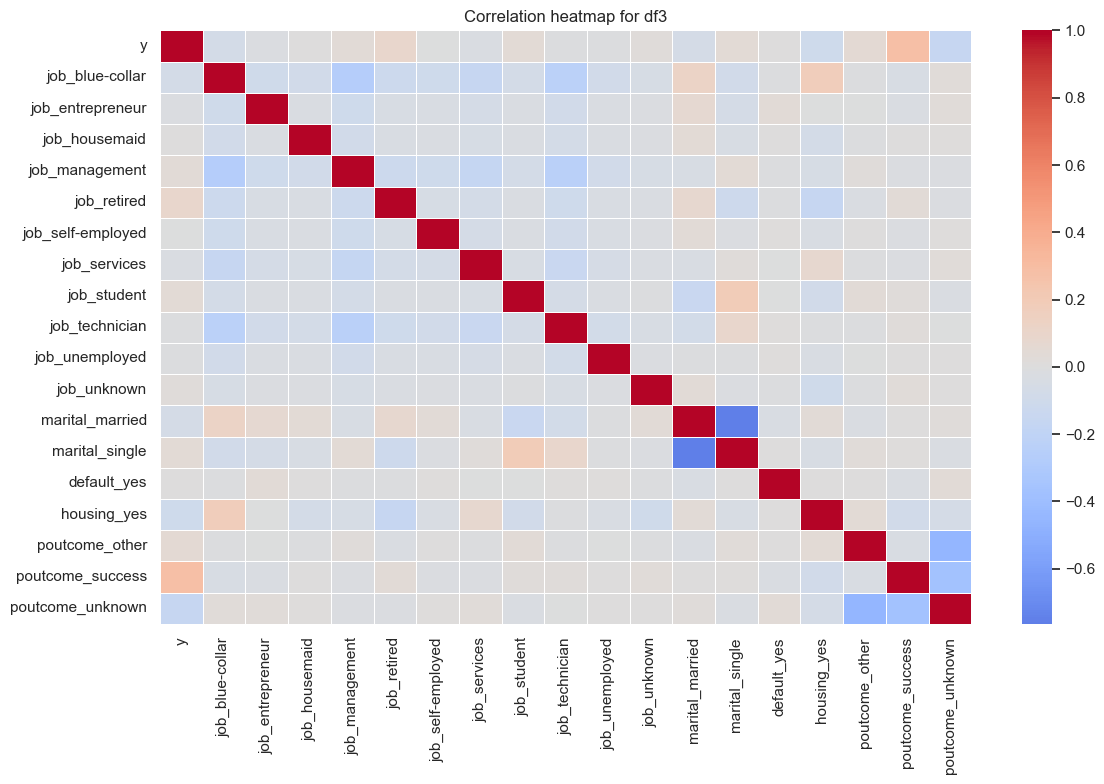


Confusion matrix:
 [[987  14]
 [113  17]]

Accuracy: 0.8877


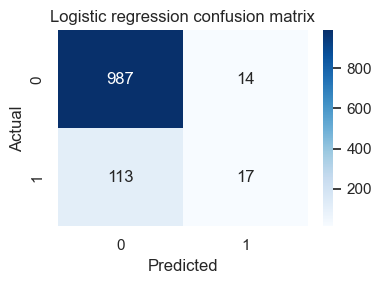

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

sns.set(style="whitegrid", context="notebook")
csv_path = "bank.csv"

try:
    df = pd.read_csv(csv_path, sep=';')
except Exception:
    df = pd.read_csv(csv_path, sep=',')

print("\nColumns:", list(df.columns))
print("\nData types:\n", df.dtypes)
print("\nHead:\n", df.head())
print("\nSummary (non-null counts):\n", df.info())

cols = ['y', 'job', 'marital', 'default', 'housing', 'poutcome']
df2 = df[cols].copy()

print("\nSelected columns (df2):", list(df2.columns))
print("\ndf2 dtypes:\n", df2.dtypes)
print("\ndf2 sample:\n", df2.head())

df3 = pd.get_dummies(
    df2,
    columns=['job', 'marital', 'default', 'housing', 'poutcome'],
    drop_first=True 
)

if df3['y'].dtype == 'object':
    df3['y'] = df3['y'].str.lower().map({'yes': 1, 'no': 0})

df3['y'] = pd.to_numeric(df3['y'], errors='coerce')

print("\ndf3 columns:", list(df3.columns))
print("\ndf3 dtypes:\n", df3.dtypes)
print("\ndf3 head:\n", df3.head())

plt.figure(figsize=(12, 8))
corr = df3.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation heatmap for df3")
plt.tight_layout()
plt.show()


X = df3.drop(columns=['y'])
y = df3['y'].fillna(0).astype(int) 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y if y.nunique() == 2 else None
)

model = LogisticRegression(
    solver='liblinear',
    max_iter=1000,
    class_weight=None  
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("\nConfusion matrix:\n", cm)
print("\nAccuracy:", round(acc, 4))

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic regression confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

df = pd.read_csv("weight-height.csv")


df['Height_cm'] = df['Height'] * 2.54
df['Weight_kg'] = df['Weight'] * 0.453592


X = df[['Height_cm']]
y = df['Weight_kg']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

norm_scaler = MinMaxScaler()
X_train_norm = norm_scaler.fit_transform(X_train)
X_test_norm = norm_scaler.transform(X_test)


std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R^2 score (unscaled KNN, k=5):", round(r2, 4))


R^2 score (unscaled KNN, k=5): 0.8346
